In [5]:
import torch
import matplotlib.pyplot as plt
import torch
import numpy as np

In [10]:
data_path = '/home/kathy531/Caesar-lig/code/AE/scripts/models/train_0809_rev_notver/'
f=data_path+'model.pkl'
checkpoint=torch.load(f, map_location=torch.device('cpu'))
a=checkpoint['train_loss']['total']
b=checkpoint['valid_loss']['total']
c=checkpoint['train_loss']['recon']
d=checkpoint['valid_loss']['recon']
e=checkpoint['train_loss']['entropy']
f=checkpoint['valid_loss']['entropy']
a_show=[np.mean(col) for col in a]
b_show=[np.mean(col) for col in b]
c_show=[np.mean(col) for col in c]
d_show=[np.mean(col) for col in d]
e_show=[np.mean(col) for col in e]
f_show=[np.mean(col) for col in f]
print(f"train_loss: {a_show}")
print(f"valid_loss: {b_show}")
print(f"train_loss recon: {c_show}")
print(f"valid_loss recon: {d_show}")
print(f"valid_loss entropy: {e_show}")
print(f"valid_loss entropy: {f_show}")
print(len(d_show))

train_loss: [6.196555, 2.1670227, 1.775823, 1.504699, 1.3127824, 1.1774979, 1.0718887, 0.9833915, 0.9169707, 0.86153567, 0.8163684, 0.77635854, 0.73773754, 0.692281, 0.6463249, 0.60765153, 0.5749686, 0.5484432, 0.52659166, 0.50755376]
valid_loss: [2.404793, 1.989416, 1.6286407, 1.4265006, 1.257508, 1.1464356, 1.0463227, 0.9704123, 0.90945166, 0.8596643, 0.8181533, 0.7804008, 0.7405098, 0.69250745, 0.6497778, 0.6145046, 0.5849379, 0.5601953, 0.53973556, 0.5205144]
train_loss recon: [6.196555, 2.1670227, 1.775823, 1.504699, 1.3127824, 1.1774979, 1.0718887, 0.9833915, 0.9169707, 0.86153567, 0.8163684, 0.77635854, 0.73773754, 0.692281, 0.6463249, 0.60765153, 0.5749686, 0.5484432, 0.52659166, 0.50755376]
valid_loss recon: [2.404793, 1.989416, 1.6286407, 1.4265006, 1.257508, 1.1464356, 1.0463227, 0.9704123, 0.90945166, 0.8596643, 0.8181533, 0.7804008, 0.7405098, 0.69250745, 0.6497778, 0.6145046, 0.5849379, 0.5601953, 0.53973556, 0.5205144]
valid_loss entropy: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [3]:
def loss_graph(valid_loss_list, valid_feat, valid_bigdata, valid, train_loss, train_recon):
    
    x_epoch=list(range(1,len(valid_loss_list)+1))
    
    color='tab:red'
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(x_epoch, valid_loss_list,color=color, label='train_loss')
    plt.plot(x_epoch, valid_feat, color='tab:blue',label='valid_loss')
    plt.plot(x_epoch, valid_bigdata, color='tab:green',label='train_recon')
    plt.plot(x_epoch, valid, color='tab:orange',label='valid_recon')
    plt.plot(x_epoch, train_loss, color='tab:grey',label='train_entropy')
    plt.plot(x_epoch, train_recon, color='tab:blue',label='valid_entropy')
    plt.tick_params(axis='y', labelcolor=color)
    plt.legend( loc='upper right')
    plt.annotate(f'{min(valid_loss_list):.4f}', xy=(x_epoch[-1], valid_loss_list[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:red')
    plt.annotate(f'{min(valid_feat):.4f}', xy=(x_epoch[-1], valid_feat[-1]), 
                 xytext=(15, 20), textcoords='offset points', ha='right', color='tab:blue')
    plt.annotate(f'{min(valid_bigdata):.4f}', xy=(x_epoch[-1], valid_bigdata[-1]), 
                 xytext=(15, 10), textcoords='offset points', ha='right', color='tab:green')
    plt.annotate(f'{min(valid):.4f}', xy=(x_epoch[-1], valid[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:orange')
    plt.annotate(f'{min(train_loss):.4f}', xy=(x_epoch[-1], valid[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:grey')
    plt.annotate(f'{min(train_recon):.4f}', xy=(x_epoch[-1], valid[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='blue')

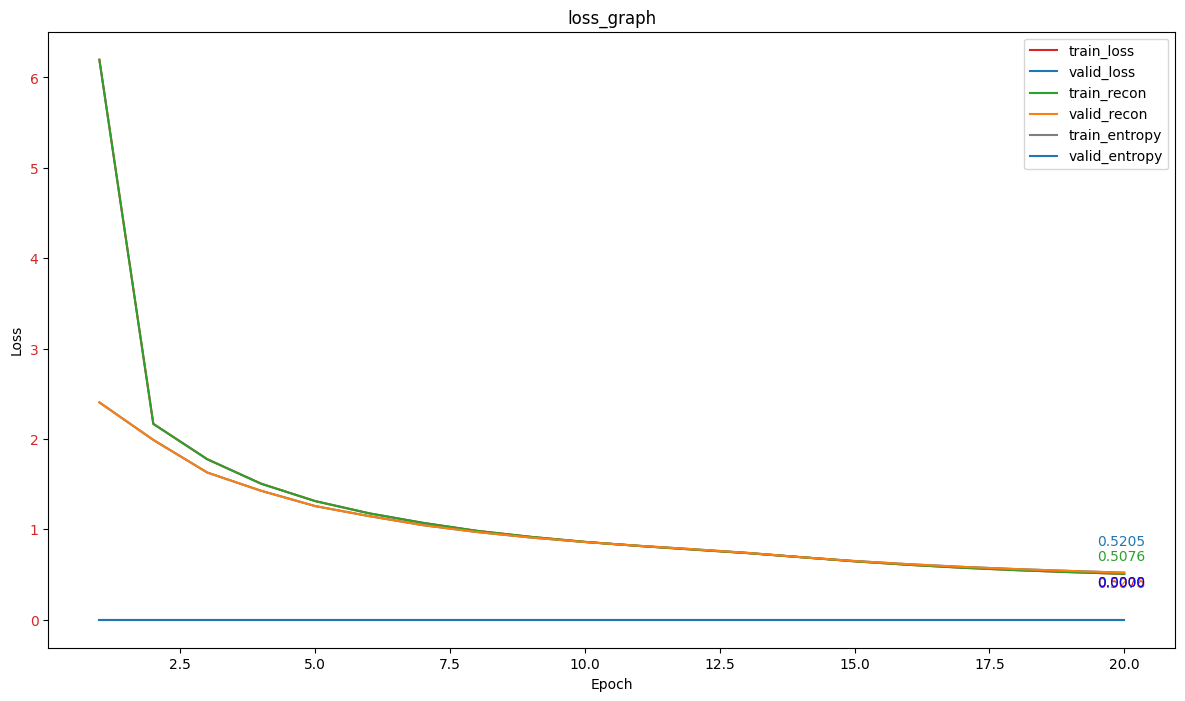

In [16]:
plt.figure(figsize=(32,8))
plt.subplot(121)
plt.title('loss_graph')
(loss_graph(a_show, b_show, c_show, d_show, e_show, f_show))
plt.show()

### TTS

In [17]:
def time_graph(valid_loss_list):
    
    x_epoch=list(range(1,len(valid_loss_list)+1))
    
    color='tab:red'
    plt.xlabel('Epoch')
    plt.ylabel('Time(s)')
    plt.plot(x_epoch, valid_loss_list,color=color, label='load_time')
    #plt.plot(x_epoch, valid_feat, color='tab:blue',label='valid')
    
    plt.tick_params(axis='y', labelcolor=color)
    plt.legend( loc='upper right')
    plt.annotate(f'{min(valid_loss_list):.4f}', xy=(x_epoch[-1], valid_loss_list[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:red')
    
    

In [18]:
train_time=[0.07659006,0.081203222,0.0858417,0.0791011,0.08171010,0.0801138878]
loss_text_ce=[0.026308,0.026177527,0.02607671,0.0258955,0.02561752,0.0254294]
loss_mel_ce=[3.478341,3.3407538,3.2540133,3.166160,2.98742294,2.8986752]
loss_total = [3.5046492,3.66693143,3.28009009,3.1920557,3.01304054,2.9241047]

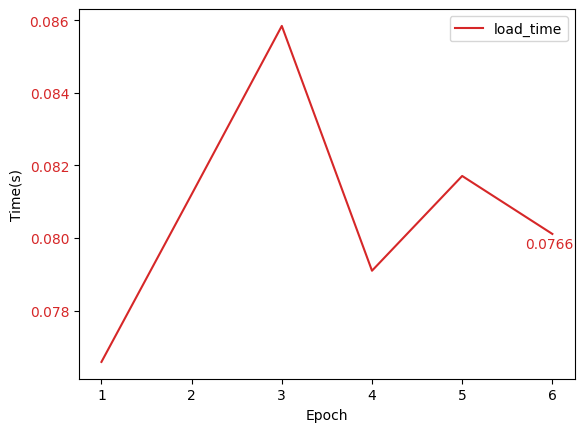

In [7]:
time_graph(train_time)

In [3]:
def loss_graph_tts(valid_loss_list, valid_feat):
    
    x_epoch=list(range(1,len(valid_loss_list)+1))
    
    color='tab:red'
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(x_epoch, valid_loss_list,color=color, label='train')
    plt.plot(x_epoch, valid_feat, color='tab:blue',label='valid')
    
    
    plt.tick_params(axis='y', labelcolor=color)
    plt.legend( loc='lower left')
    plt.annotate(f'{min(valid_loss_list):.4f}', xy=(x_epoch[-1], valid_loss_list[-1]), 
                 xytext=(15, -10), textcoords='offset points', ha='right', color='tab:red')
    plt.annotate(f'{min(valid_feat):.4f}', xy=(x_epoch[-1], valid_feat[-1]), 
                 xytext=(15, 20), textcoords='offset points', ha='right', color='tab:blue')
    
    

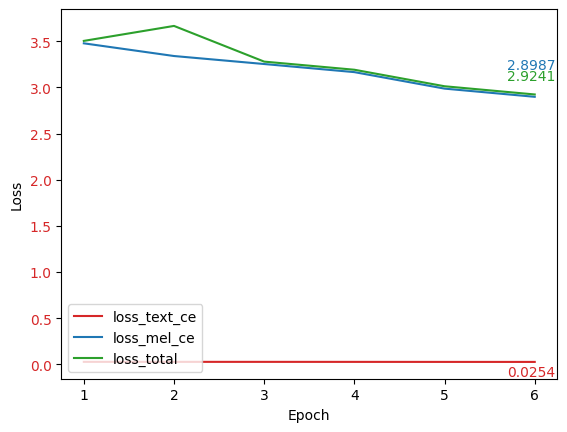

In [26]:
loss_graph_tts(loss_text_ce,loss_mel_ce,loss_total)

### MaskGAE(en:8. de:8, LR: 1e-5)

In [21]:
import torch
import numpy as np
data_path = '/home/kathy531/Caesar-lig/code/MaskGAE/scripts/models/prac_0814/'
f=data_path+'model.pkl'
checkpoint=torch.load(f, map_location=torch.device('cpu'))
a=checkpoint['train_loss']['total'][3:]
b=checkpoint['valid_loss']['total'][3:]
c=checkpoint['train_loss']['lossKL'][3:]
d=checkpoint['valid_loss']['lossKL'][3:]
e=checkpoint['train_loss']['lossCE'][3:]
f=checkpoint['valid_loss']['lossCE'][3:]
a_show=[np.mean(col) for col in a]
b_show=[np.mean(col) for col in b]
c_show=[np.mean(col) for col in c]
d_show=[np.mean(col) for col in d]
e_show=[np.mean(col) for col in e]
f_show=[np.mean(col) for col in f]
print(f"train_loss: {a_show}")
print(f"valid_loss: {b_show}")
print(f"train_loss lossKL: {c_show}")
print(f"valid_loss lossKL: {d_show}")
print(f"valid_loss lossCE: {e_show}")
print(f"valid_loss lossCE: {f_show}")
print(len(d_show))

train_loss: [5.7443423, 4.999405, 4.5196576, 4.024174, 3.6444793, 3.3451395, 3.056956, 2.816886, 2.5952444, 2.3902664, 2.2082622, 2.051251, 1.9144968, 1.7942106, 1.684901, 1.5925407, 1.5152619, 1.4586608, 1.4244525, 1.4115863, 1.4061216, 1.4066138, 1.4046305, 1.4046967, 1.404947, 1.4046173, 1.4035649, 1.4028518, 1.4057597, 1.4023796, 1.4030429, 1.4017398, 1.4014543, 1.4006528, 1.4022158, 1.3987772, 1.3999766, 1.3991334, 1.4002355, 1.3998097, 1.3986099, 1.3974739, 1.3984488, 1.3974243, 1.3975469, 1.3974762, 1.3972211]
valid_loss: [6.0995154, 5.158, 4.754082, 4.092343, 3.6766334, 3.3191812, 3.0266173, 2.783517, 2.554917, 2.3423247, 2.1732233, 2.021836, 1.8803931, 1.7616876, 1.6579477, 1.5622401, 1.4899257, 1.4400547, 1.4158837, 1.41004, 1.4071527, 1.4064775, 1.406111, 1.405105, 1.4039731, 1.4055438, 1.414461, 1.402799, 1.4013194, 1.4027995, 1.4031068, 1.3989118, 1.401879, 1.4018342, 1.4021313, 1.3983065, 1.400132, 1.3995026, 1.3980507, 1.3989898, 1.4017746, 1.3968873, 1.3981136, 1.400813

#### MaskGAE CE

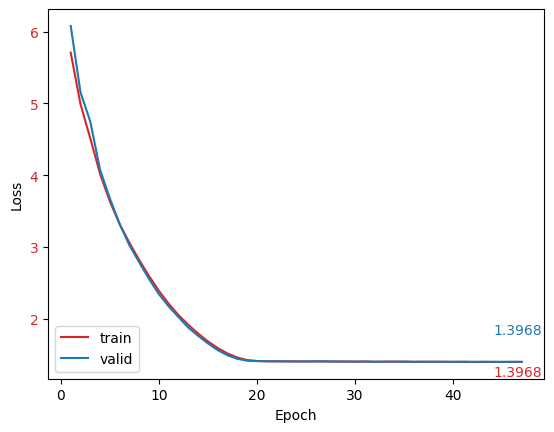

In [27]:
loss_graph_tts(e_show,f_show)

#### MaskGAE KL

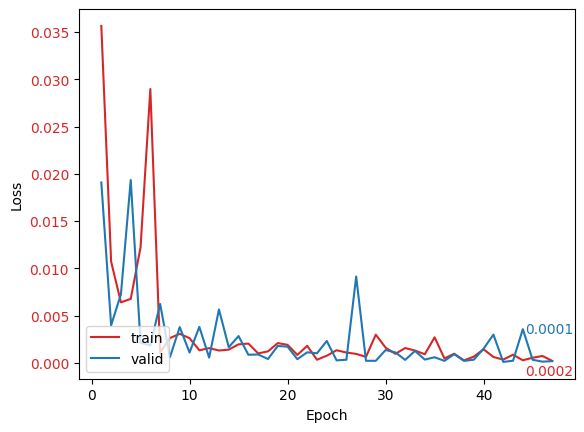

In [24]:
loss_graph_tts(c_show,d_show)

#### MaskGAE total

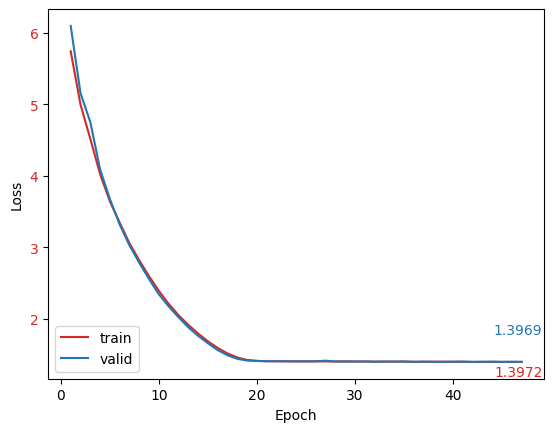

In [25]:
loss_graph_tts(a_show,b_show)

### MaskGAE(en:4, de:4, LR:1e-4)

In [28]:
import torch
import numpy as np
data_path_b = '/home/kathy531/Caesar-lig/code/MaskGAE/scripts/models/prac_0813_rev2/'
f=data_path_b+'model.pkl'
checkpoint_b=torch.load(f, map_location=torch.device('cpu'))
a_b=checkpoint_b['train_loss']['total'][3:]
b_b=checkpoint_b['valid_loss']['total'][3:]
c_b=checkpoint_b['train_loss']['lossKL'][3:]
d_b=checkpoint_b['valid_loss']['lossKL'][3:]
e_b=checkpoint_b['train_loss']['lossCE'][3:]
f_b=checkpoint_b['valid_loss']['lossCE'][3:]
a_show_b=[np.mean(col) for col in a_b]
b_show_b=[np.mean(col) for col in b_b]
c_show_b=[np.mean(col) for col in c_b]
d_show_b=[np.mean(col) for col in d_b]
e_show_b=[np.mean(col) for col in e_b]
f_show_b=[np.mean(col) for col in f_b]
print(f"train_loss: {a_show_b}")
print(f"valid_loss: {b_show_b}")
print(f"train_loss lossKL: {c_show_b}")
print(f"valid_loss lossKL: {d_show_b}")
print(f"valid_loss lossCE: {e_show_b}")
print(f"valid_loss lossCE: {f_show_b}")
print(len(d_show_b))

train_loss: [1.4473828, 1.4303811, 1.4231994, 1.4394963, 1.4020616, 1.4077777, 1.4010537, 1.421524, 1.3915899, 1.3972213, 1.4003309, 1.3970426, 1.4055676, 1.4062198, 1.4191078, 1.3916433, 1.3947566, 1.393988, 1.3972508, 1.3929572, 1.3977331, 1.3997514, 1.3985038, 1.3910228, 1.3979517, 1.3952159, 1.3928432, 1.3970692, 1.4058856, 1.3964784, 1.3962673, 1.390738, 1.3922391, 1.3973488, 1.3894528, 1.3880142, 1.404078, 1.3896415, 1.4015687, 1.3896786, 1.3895609, 1.3880628, 1.3931564, 1.3874711, 1.3892616, 1.3886986, 1.3889633, 1.3902875, 1.3932151, 1.3890094, 1.3901275, 1.3961539, 1.3875288, 1.3874227, 1.3891853, 1.3897823, 1.3872818, 1.387976, 1.3872368, 1.3902013, 1.390257, 1.3958272, 1.3885548, 1.3876519, 1.3888062, 1.3875445, 1.3883375, 1.3890865, 1.3869952, 1.3867749, 1.3897438, 1.3878943, 1.3867533, 1.3877963, 1.3868029, 1.3907644, 1.3871824]
valid_loss: [1.4034998, 1.5056102, 1.4034617, 1.3992882, 1.4008926, 1.4061062, 1.3932227, 1.3910949, 1.3912522, 1.3897746, 1.401162, 1.3892559, 1.

#### MaskGAE total

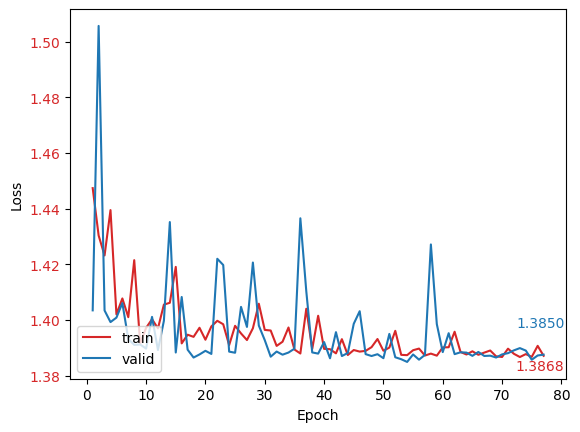

In [30]:
loss_graph_tts(a_show_b,b_show_b)

#### MaskGAE KL

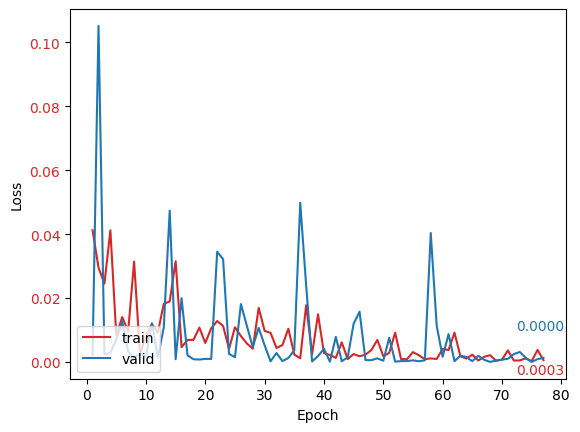

In [33]:
loss_graph_tts(c_show_b,d_show_b)

#### MaskGAE CE

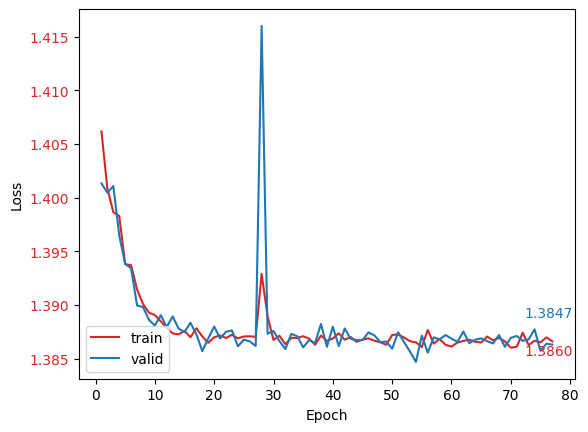

In [32]:
loss_graph_tts(e_show_b,f_show_b)

### AE

In [19]:
data_path = '/home/kathy531/Caesar-lig/code/AE/scripts/models/train_0814/'
f=data_path+'model.pkl'
checkpoint=torch.load(f, map_location=torch.device('cpu'))
a_ae=checkpoint['train_loss']['total'][5:]
b_ae=checkpoint['valid_loss']['total'][5:]

ae_show=[np.mean(col) for col in a_ae]
be_show=[np.mean(col) for col in b_ae]

print(f"train_loss: {ae_show}")
print(f"valid_loss: {be_show}")

print(len(ae_show))

train_loss: [1.3143156, 1.19664, 1.0735815, 0.9300946, 0.80251217, 0.71301, 0.6429962, 0.5860241, 0.5414668, 0.50825804, 0.48196533, 0.46021414, 0.44091403, 0.42292044, 0.40596643, 0.38952214, 0.37306502, 0.3567604, 0.34118906, 0.3274025, 0.31585413, 0.30656135, 0.29914567, 0.29306096, 0.28787842, 0.28323713, 0.27901134, 0.2749824, 0.27103668, 0.26723573, 0.26346853, 0.25961816, 0.25580293, 0.25194564, 0.24794367, 0.24384588, 0.2396932, 0.23571904, 0.23181906, 0.22802398, 0.22439454, 0.22083597, 0.21730204, 0.21369502, 0.21002683]
valid_loss: [1.2939862, 1.1750919, 1.042075, 0.8873287, 0.7806607, 0.69831264, 0.6318987, 0.57793623, 0.5380491, 0.50782365, 0.48354775, 0.46288407, 0.44345742, 0.42530206, 0.40800434, 0.39134833, 0.37489673, 0.35949373, 0.34542844, 0.33318642, 0.32290012, 0.31471136, 0.3079892, 0.30247363, 0.29741785, 0.29293612, 0.28858382, 0.28429756, 0.2802291, 0.2760325, 0.27198184, 0.26761743, 0.26350656, 0.25920781, 0.2548379, 0.25020576, 0.24591422, 0.24178788, 0.2377

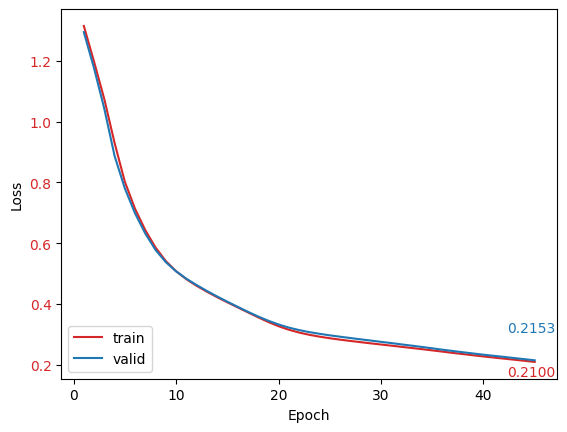

In [20]:
loss_graph_tts(ae_show,be_show)

In [20]:
import numpy as np
print(-2*np.log(0.5))

1.3862943611198906
